In [1]:
import os

import pandas as pd
from scipy.stats import zscore
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from matplotlib import pyplot
from itertools import combinations
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
v1 = pd.read_excel("/home/nick/PycharmProjects/Engineering_EKB/data/new_dataset_1.xlsx")
v3 = pd.read_excel("/home/nick/PycharmProjects/Engineering_EKB/data/new_dataset_3.xlsx")
v4 = pd.read_excel("/home/nick/PycharmProjects/Engineering_EKB/data/new_dataset_4.xlsx")
v5 = pd.read_excel("/home/nick/PycharmProjects/Engineering_EKB/data/new_dataset_5.xlsx")
v6 = pd.read_excel("/home/nick/PycharmProjects/Engineering_EKB/data/new_dataset_6.xlsx")

vavg = pd.concat([v1, v3, v4, v5, v6]).groupby(level=0).mean()

In [3]:
vavg = vavg.drop(['DELTA30'], axis=1)

In [4]:
df = pd.read_excel('/home/nick/PycharmProjects/Engineering_EKB/data/new_df_66.xlsx', engine='openpyxl')
seq_and_y = df.iloc[:, 128:]
vavg = pd.concat([vavg, seq_and_y], axis=1)

In [5]:
X = vavg.drop(['DELTA30'], axis=1)
Y = vavg['DELTA30']

In [6]:
# corr_matrix = df.corr()
# corr_matrix.style.background_gradient(cmap='coolwarm')

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [8]:
seed = 7
model = xgb.LGBMRegressor(verbosity=1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=7)
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14349
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 188
[LightGBM] [Info] Start training from score 0.716071
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [9]:
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
model = xgb.LGBMRegressor(verbosity=0)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
predictions
results = model.evals_result_
# l1 is MAE l2 is MSE

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's l1: 1.09351	training's rmse: 1.39034	training's l2: 1.93304	valid_1's l1: 1.24148	valid_1's rmse: 1.59242	valid_1's l2: 2.53581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's l1: 1.0251	training's rmse: 1.31097	training's l2: 1.71864	valid_1's l1: 1.18799	valid_1's rmse: 1.52648	valid_1's l2: 2.33015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's l1: 0.966357	training's rmse: 1.24772	training's l2: 1.5568	valid_1's l1: 1.13909	valid_1's rmse: 1.46871	valid_1's l2: 2.15711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's l1: 0.908298	training's rmse: 1.18524	training's l2: 1.4048	valid_1's l1: 1.10104	valid_1's 

/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


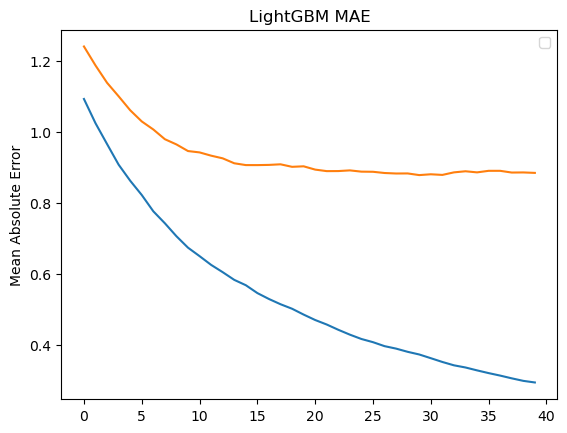

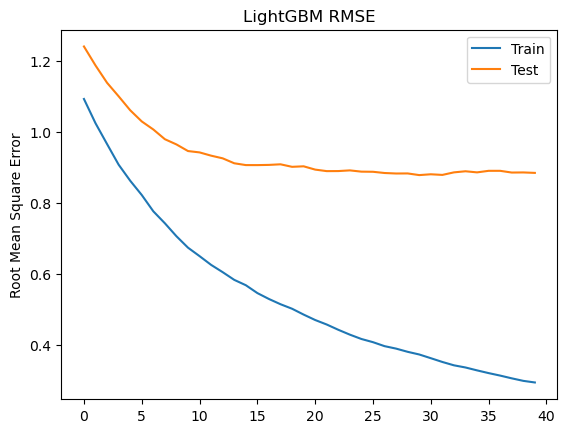

In [10]:
epoch = len(results['valid_1']['l1'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'])
ax.plot(x_axis, results['valid_1']['l1'])
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('LightGBM MAE')
#pyplot.savefig('LightGBM_MAE_raw.png')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'], label='Train')
ax.plot(x_axis, results['valid_1']['l1'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('LightGBM RMSE')
#pyplot.savefig('LightGBM_RMSE_raw.png')
pyplot.show()

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error



parameters = {'learning_rate': [0.001,0.004,0.008,0.01,0.02,0.03,0.04,0.05,0.06,0.07,
                                0.08,0.09,0.1,0.2,0.4,0.6,0.8,1],
              'max_depth': range(1,100,10),
              'num_leaves': range(1,100,10),
              'colsample_bytree': [0.1,0.2,0.4,0.8,1],
              'min_split_gain': range(0,20,1),
              'n_estimators': range(10,1000,10),
              "reg_alpha"   : [0.1,0.2,0.4,0.6,0.8,1],
              "reg_lambda"  : range(1,10,1)
          }

xgb_model = LGBMRegressor(random_state=7)

grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters, cv=5,n_iter=15,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
grid_obj_xgb.fit(X_train, y_train, verbose=1)

y_pred_train = grid_obj_xgb.predict(X_train)
y_pred_test = grid_obj_xgb.predict(X_test)

err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_au

In [12]:
print('\n All results:')
print(grid_obj_xgb.cv_results_)
print('\n Best estimator:')
print(grid_obj_xgb.best_estimator_)
print('\n Best hyperparameters:')
print(grid_obj_xgb.best_params_)
results = pd.DataFrame(grid_obj_xgb.cv_results_)#


 All results:
{'mean_fit_time': array([0.0455204 , 0.02872276, 0.00245008, 0.01351085, 0.01667256,
       0.04149275, 0.09111872, 0.04599495, 0.11912084, 0.00224533,
       0.0240252 , 0.05662909, 0.03460445, 0.01762938, 0.07203803]), 'std_fit_time': array([8.44971762e-03, 3.66434870e-03, 7.38176951e-04, 9.89100624e-04,
       1.14028054e-03, 2.63351890e-03, 1.88970003e-02, 6.85966008e-03,
       3.77018505e-03, 7.90279875e-05, 3.18207768e-03, 1.01145783e-02,
       6.00188453e-03, 2.28637948e-03, 2.74666930e-03]), 'mean_score_time': array([0.00163679, 0.00205379, 0.        , 0.00120449, 0.00113816,
       0.00101762, 0.00146313, 0.00187163, 0.00288267, 0.        ,
       0.00174885, 0.00140948, 0.00174632, 0.00149069, 0.00091033]), 'std_score_time': array([3.45323857e-04, 3.23998179e-04, 0.00000000e+00, 9.08014897e-05,
       1.25402135e-04, 2.27798441e-05, 2.23260046e-04, 2.57959445e-04,
       5.83079616e-04, 0.00000000e+00, 2.29196947e-04, 2.94356502e-04,
       2.09529681e-04, 4.

In [13]:
Best_estimator = LGBMRegressor(colsample_bytree=1, learning_rate=0.05, max_depth=21,
              min_split_gain=6, n_estimators=210, num_leaves=11, random_state=7,
              reg_alpha=1, reg_lambda=8)


[1]	training's l1: 1.13791	training's rmse: 1.44237	training's l2: 2.08043	valid_1's l1: 1.28742	valid_1's rmse: 1.63894	valid_1's l2: 2.68611
[2]	training's l1: 1.10925	training's rmse: 1.40948	training's l2: 1.98663	valid_1's l1: 1.25739	valid_1's rmse: 1.60752	valid_1's l2: 2.58412
[3]	training's l1: 1.08213	training's rmse: 1.37868	training's l2: 1.90077	valid_1's l1: 1.22931	valid_1's rmse: 1.57849	valid_1's l2: 2.49164
[4]	training's l1: 1.05624	training's rmse: 1.34988	training's l2: 1.82218	valid_1's l1: 1.20473	valid_1's rmse: 1.55172	valid_1's l2: 2.40782
[5]	training's l1: 1.03166	training's rmse: 1.32296	training's l2: 1.75023	valid_1's l1: 1.18579	valid_1's rmse: 1.52797	valid_1's l2: 2.33468
[6]	training's l1: 1.01025	training's rmse: 1.2993	training's l2: 1.68819	valid_1's l1: 1.16774	valid_1's rmse: 1.50583	valid_1's l2: 2.26754
[7]	training's l1: 0.987717	training's rmse: 1.27556	training's l2: 1.62706	valid_1's l1: 1.1503	valid_1's rmse: 1.48477	valid_1's l2: 2.20453


/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


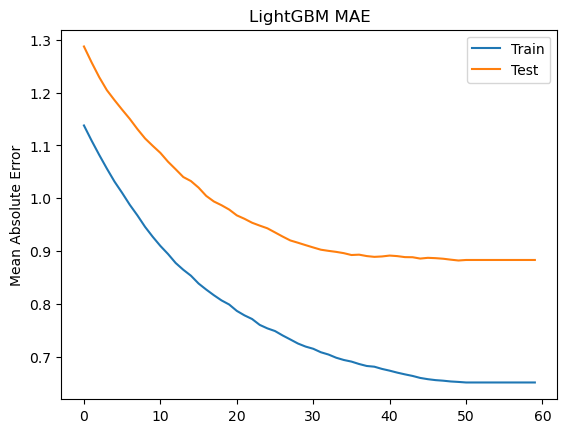

In [14]:
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
Best_estimator.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = Best_estimator.predict(X_test)
predictions = [value for value in y_pred]
predictions
results = Best_estimator.evals_result_
epoch = len(results['training']['l1'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'], label='Train')
ax.plot(x_axis, results['valid_1']['l1'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('LightGBM MAE')
pyplot.savefig('LightGBM_MAE_tuned.png')
pyplot.show()

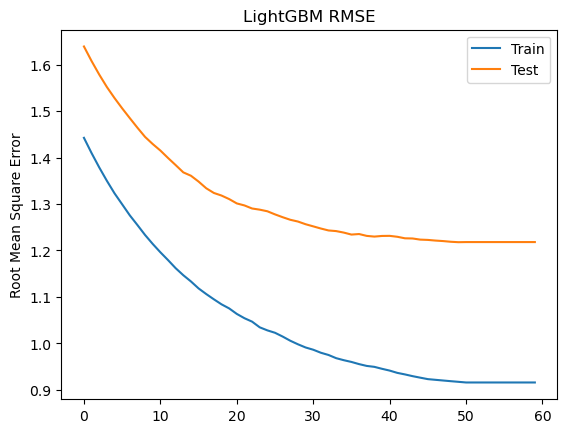

In [15]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('LightGBM RMSE')
pyplot.savefig('LightGBM_RMSE_tuned.png')
pyplot.show()

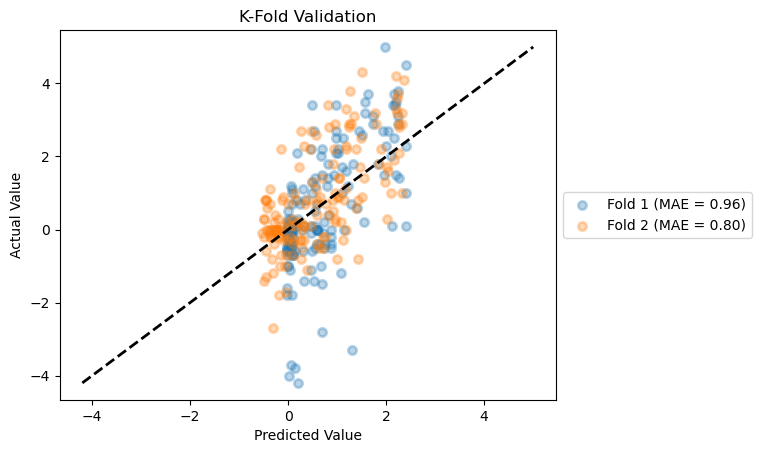

Average of CV: 0.8818544263573795
All Scores of CV [0.9619171057739994, 0.8017917469407597]


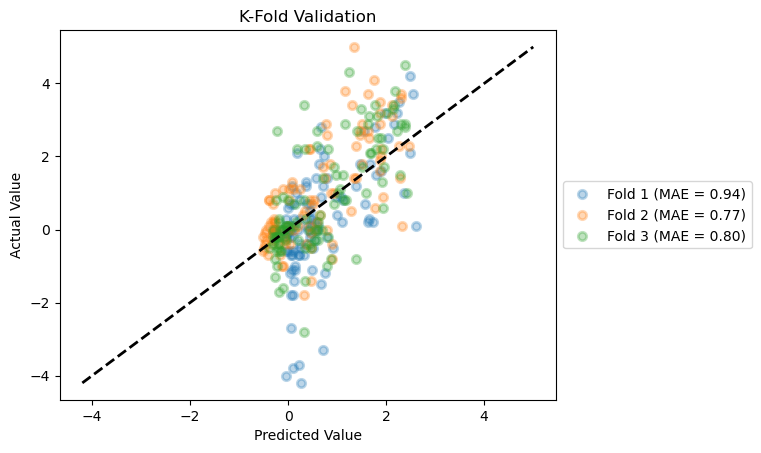

Average of CV: 0.8371807139886899
All Scores of CV [0.9440006544272752, 0.7697332023494208, 0.7978082851893735]


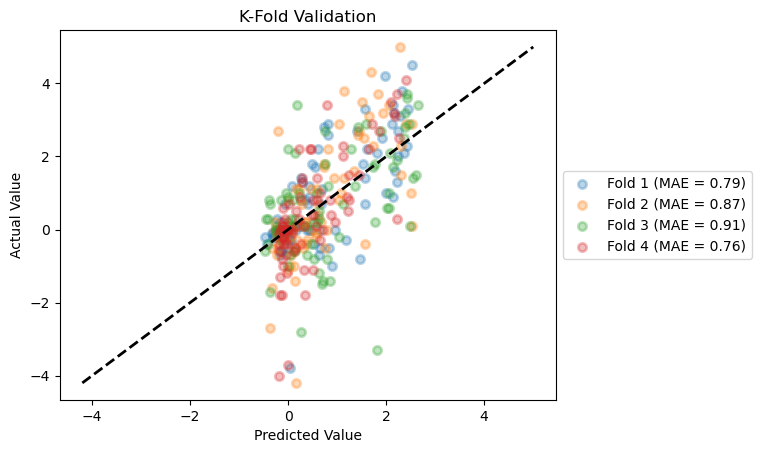

Average of CV: 0.8315305068005269
All Scores of CV [0.7865495686199346, 0.86899253257308, 0.9057718411930303, 0.7648080848160624]


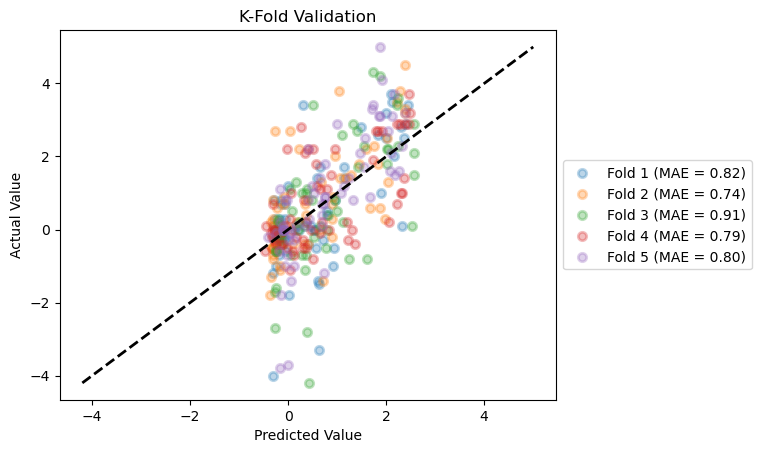

Average of CV: 0.8121501805940247
All Scores of CV [0.8199636597830648, 0.7381517429760103, 0.907790071179998, 0.794447300159915, 0.8003981288711349]


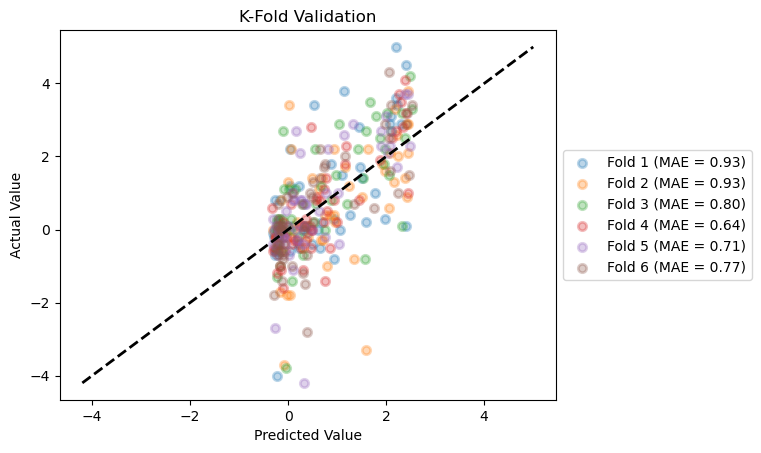

Average of CV: 0.795726144689059
All Scores of CV [0.9284028107505509, 0.9298757316943309, 0.7969045724869217, 0.6432390636106308, 0.7075584846542298, 0.7683762049376893]


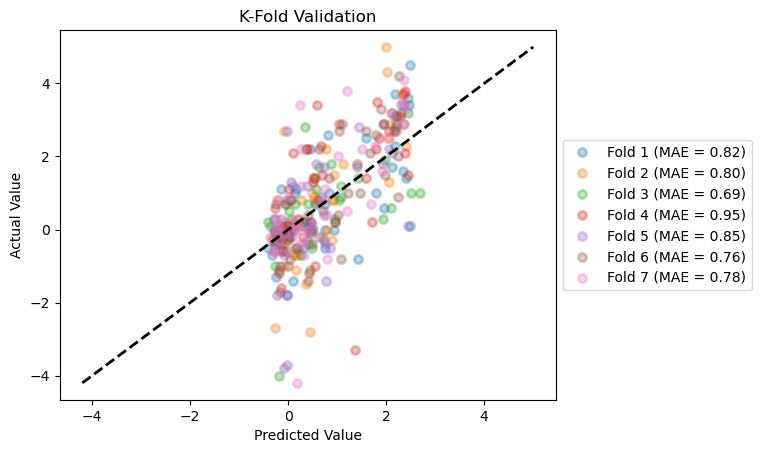

Average of CV: 0.8090378071867568
All Scores of CV [0.8213660010810304, 0.8019276570760631, 0.6866495837094715, 0.9530636773927662, 0.8519815424961036, 0.7646777505903557, 0.7835984379615067]


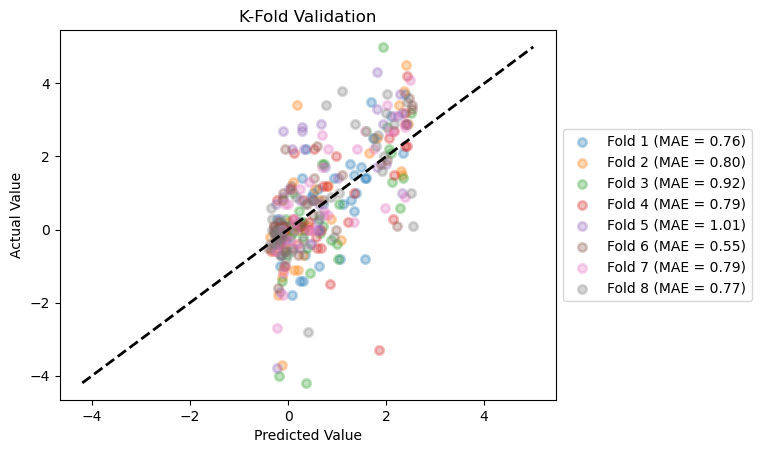

Average of CV: 0.7982465751708319
All Scores of CV [0.7602745628875355, 0.79715284997739, 0.9163584714467979, 0.7948841025852241, 1.0064764642767443, 0.5476601198612904, 0.7912630274759538, 0.7719030028557191]


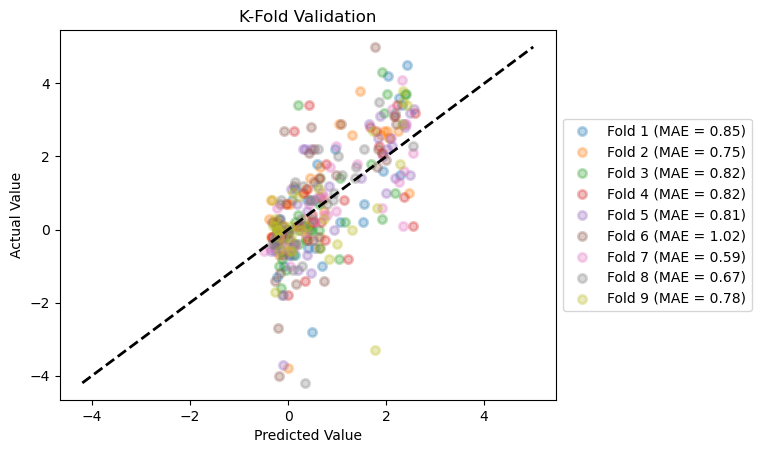

Average of CV: 0.7904653814100412
All Scores of CV [0.8478767362496112, 0.7507002394911931, 0.8218022661432379, 0.8160768077644273, 0.814740323066183, 1.0209401229532982, 0.594525596407299, 0.666789614880986, 0.7807367257341353]


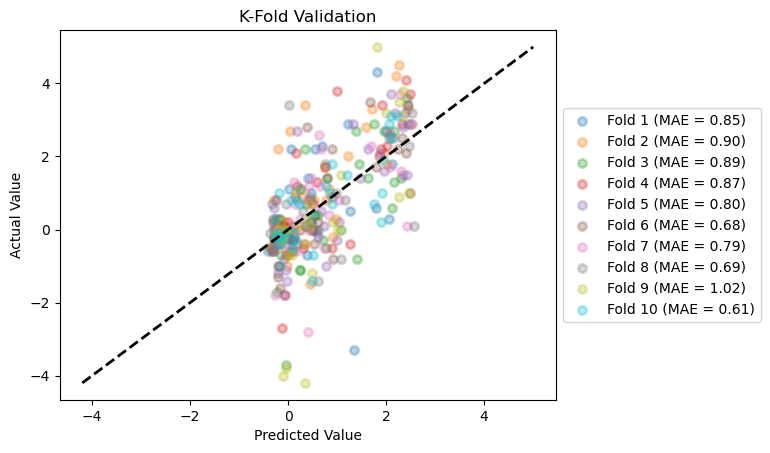

Average of CV: 0.812086150767656
All Scores of CV [0.8527634873683145, 0.9032154041295144, 0.8873468089974295, 0.8720739539612288, 0.798531191418036, 0.6812071069944616, 0.794684114578357, 0.6929928538934917, 1.0241240668804186, 0.6139225194553074]


In [16]:
n_fold = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for fold in n_fold:
    scores = []
    cv = KFold(n_splits=fold, shuffle=True)
    fig = plt.figure()
    i = 1
    for train, test in cv.split(X, Y):
        prediction = Best_estimator.fit(X.iloc[train],
                     Y.iloc[train]).predict(X.iloc[test])
        true = Y.iloc[test]
        score = mean_absolute_error(true, prediction)
        scores.append(score)
        plt.scatter(prediction, true, lw=2, alpha=0.3,
                    label='Fold %d (MAE = %0.2f)' % (i,score))
        i = i+1
    plt.plot([min(Y),max(Y)], [min(Y),max(Y)],
             linestyle='--', lw=2, color='black')
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')
    plt.title('K-Fold Validation')
    plt.legend(prop={"size":10}, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    print("Average of CV:", mean(scores))
    print("All Scores of CV", scores)

In [17]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(Best_estimator, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1666 ± 0.0565,VHSE2.1
0.1250 ± 0.0853,BLOSUM8.1
0.0784 ± 0.0586,halpha
0.0487 ± 0.0442,T4.1
0.0248 ± 0.0086,KF7.1
0.0238 ± 0.0174,ST2.1
0.0151 ± 0.0123,Z3.1
0.0105 ± 0.0054,KF8.1
0.0082 ± 0.0102,apol_as_prop
0.0079 ± 0.0050,X.a


In [18]:
# from sklearn.feature_extraction import DictVectorizer
# vec = DictVectorizer()
# booster = Best_estimator.get_booster()
# original_feature_names = booster.feature_names
# print(booster.get_dump()[0])
# booster.feature_names = original_feature_names

In [19]:
# this might be the best one
eli5.show_weights(Best_estimator, importance_type="weight")  #"weight" - how often a feature has been used in making splits

Weight,Feature
0.1404,halpha
0.1124,VHSE2.1
0.1067,BLOSUM8.1
0.1011,T4.1
0.0843,h_3.10
0.0730,ST2.1
0.0506,KF7.1
0.0506,Z3.1
0.0393,KF8.1
0.0281,apol_as_prop


In [20]:
eli5.show_weights(Best_estimator, importance_type="split")

Weight,Feature
0.1404,halpha
0.1124,VHSE2.1
0.1067,BLOSUM8.1
0.1011,T4.1
0.0843,h_3.10
0.0730,ST2.1
0.0506,KF7.1
0.0506,Z3.1
0.0393,KF8.1
0.0281,apol_as_prop


In [21]:
eli5.show_weights(Best_estimator, importance_type="gain") #"gain" - that is the average gain of the feature when it is used in trees.

Weight,Feature
0.3597,VHSE2.1
0.2281,BLOSUM8.1
0.0892,halpha
0.0567,T4.1
0.0498,ST2.1
0.0400,KF7.1
0.0378,h_3.10
0.0347,Z3.1
0.0161,KF8.1
0.0150,X.m


In [22]:
from sklearn import metrics
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
## residuals
residuals = []
for i, c in zip(y_test, y_pred):
    residuals.append(i - c)

R2 (explained variance): 0.47
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 9.1
Mean Absolute Error (Σ|y-pred|/n): 0.88
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1.22


In [23]:
######## COMPARING DATASET ORIGIN #################

In [24]:
MDPocket = X.iloc[:, :80]
MD = X.iloc[:, 80:126]
Seq = X.iloc[:, 126:]
Seq_MD = X.iloc[:, 80:]
MD_MDpocket = X.iloc[:, :126]
Seq_MDpocket = pd.concat([MDPocket, Seq], axis =1)
datasets = [MDPocket, MD, Seq, Seq_MD, MD_MDpocket, Seq_MDpocket]
parameters = {'learning_rate': [0.001,0.004,0.008,0.01,0.02,0.03,0.04,0.05,0.06,0.07,
                                0.08,0.09,0.1,0.2,0.4,0.6,0.8,1],
              'max_depth': range(1,100,10),
              'num_leaves': range(1,100,10),
              'colsample_bytree': [0.1,0.2,0.4,0.8,1],
              'min_split_gain': range(0,20,1),
              'n_estimators': range(10,1000,10),
              "reg_alpha"   : [0.1,0.2,0.4,0.6,0.8,1],
              "reg_lambda"  : range(1,10,1)
          }
for dataset in datasets:
    X_train, X_test, y_train, y_test = train_test_split(dataset, Y, test_size=0.2, random_state=7)
    xgb_model = LGBMRegressor(random_state=7)

    grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters, cv=5,n_iter=15,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
    grid_obj_xgb.fit(X_train, y_train,verbose = 1)

    y_pred_train = grid_obj_xgb.predict(X_train)
    y_pred_test = grid_obj_xgb.predict(X_test)

    err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')



    print('\n All results:')
    print(grid_obj_xgb.cv_results_)
    print('\n Best estimator:')
    print(grid_obj_xgb.best_estimator_)
    print('\n Best hyperparameters:')
    print(grid_obj_xgb.best_params_)
    results = pd.DataFrame(grid_obj_xgb.cv_results_)#

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed ou


 All results:
{'mean_fit_time': array([0.02498746, 0.02878776, 0.05557575, 0.00184569, 0.02319803,
       0.02071266, 0.06719289, 0.02233672, 0.04564457, 0.01963921,
       0.01145744, 0.01633358, 0.02952785, 0.02878151, 0.00934863]), 'std_fit_time': array([0.00361108, 0.00467976, 0.00297701, 0.00019878, 0.00639221,
       0.00253699, 0.00812867, 0.00040962, 0.00983387, 0.00286681,
       0.00129101, 0.00358408, 0.00577062, 0.00528301, 0.00061721]), 'mean_score_time': array([0.0017601 , 0.00138106, 0.00145926, 0.        , 0.00153689,
       0.00117955, 0.00144277, 0.00125127, 0.00136929, 0.00124831,
       0.00123887, 0.00110693, 0.00092273, 0.00076408, 0.00097017]), 'std_score_time': array([5.20734922e-04, 3.28560131e-04, 4.33857268e-04, 0.00000000e+00,
       1.88888759e-04, 2.21594831e-04, 4.90845331e-04, 2.32163164e-04,
       5.83318024e-04, 1.59539367e-04, 7.78718148e-05, 1.71053619e-04,
       1.98434304e-04, 7.24418129e-05, 1.39268649e-04]), 'param_reg_lambda': masked_array(da

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_au


 All results:
{'mean_fit_time': array([0.00540733, 0.02703261, 0.00619159, 0.02283311, 0.03270888,
       0.01770768, 0.02111163, 0.01189747, 0.04157844, 0.00161352,
       0.00898714, 0.0013629 , 0.00144053, 0.02349243, 0.02781792]), 'std_fit_time': array([0.00026573, 0.00398944, 0.00095754, 0.00415162, 0.0043535 ,
       0.00255228, 0.00030906, 0.00026347, 0.00721613, 0.00012569,
       0.00098101, 0.00022755, 0.00030128, 0.0040094 , 0.00380119]), 'mean_score_time': array([0.0007082 , 0.00097404, 0.00100369, 0.00138602, 0.00100331,
       0.00093641, 0.00129609, 0.00113888, 0.0009079 , 0.        ,
       0.00096669, 0.        , 0.        , 0.00136013, 0.00138206]), 'std_score_time': array([1.86055724e-05, 1.36902481e-04, 1.52777941e-04, 2.41098817e-04,
       1.28782091e-04, 2.04859510e-04, 6.00247645e-05, 8.56117795e-05,
       1.80391159e-04, 0.00000000e+00, 1.68203765e-04, 0.00000000e+00,
       0.00000000e+00, 2.93688314e-04, 1.02484725e-03]), 'param_reg_lambda': masked_array(da

/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log


 All results:
{'mean_fit_time': array([0.02206955, 0.00125957, 0.07801504, 0.25213637, 0.02293544,
       0.04022703, 0.03434029, 0.04225545, 0.05304866, 0.05638757,
       0.06918297, 0.05927315, 0.02437057, 0.0155901 , 0.06347671]), 'std_fit_time': array([0.00505981, 0.00023416, 0.01291028, 0.03538917, 0.00263847,
       0.00472469, 0.00507086, 0.0084161 , 0.00118221, 0.00761673,
       0.01137629, 0.01091143, 0.00274047, 0.00065044, 0.01193585]), 'mean_score_time': array([0.00118599, 0.        , 0.00152636, 0.00229154, 0.00115461,
       0.00122213, 0.00145326, 0.00107555, 0.00127716, 0.00162287,
       0.0011158 , 0.00112991, 0.0011795 , 0.00124183, 0.00096235]), 'std_score_time': array([1.44271856e-04, 0.00000000e+00, 2.97803073e-04, 3.66157836e-04,
       1.34094663e-04, 5.83573489e-05, 1.54124702e-04, 2.59666157e-04,
       8.30169795e-05, 2.63422878e-04, 2.92374483e-04, 2.94454625e-04,
       2.75047568e-04, 1.65652707e-05, 1.58269328e-04]), 'param_reg_lambda': masked_array(da

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /home/conda/feedstock_root/build_artifacts/lightgbm_1674563372805/work/compile/src/io/config_auto.cpp, line 334 .

/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed o


 All results:
{'mean_fit_time': array([0.06236553, 0.04057565, 0.0625433 , 0.00159273, 0.01260777,
       0.03080425, 0.03139682, 0.08345423, 0.01802006, 0.02612677,
       0.01196246, 0.02774658, 0.05524998, 0.00179029, 0.02945666]), 'std_fit_time': array([0.01006823, 0.01101378, 0.0082992 , 0.00027411, 0.00110922,
       0.00152723, 0.00543169, 0.01238438, 0.00340973, 0.0027769 ,
       0.00148171, 0.00364857, 0.01156133, 0.00010367, 0.00494435]), 'mean_score_time': array([0.00202308, 0.00186777, 0.00144606, 0.        , 0.00138702,
       0.00171881, 0.00153303, 0.00163665, 0.00117607, 0.00204315,
       0.00145645, 0.00153646, 0.00102034, 0.        , 0.00102792]), 'std_score_time': array([1.74490303e-03, 3.53832932e-04, 2.73172446e-04, 0.00000000e+00,
       2.31619035e-04, 9.09641589e-05, 3.00088971e-04, 3.89737903e-04,
       2.15762486e-04, 1.11258231e-03, 1.27398931e-04, 2.15707955e-04,
       3.00718464e-04, 0.00000000e+00, 2.64063300e-04]), 'param_reg_lambda': masked_array(da

/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log


 All results:
{'mean_fit_time': array([0.01140475, 0.09123926, 0.00213933, 0.03518543, 0.02870145,
       0.03793077, 0.05532794, 0.01167626, 0.04321165, 0.11538081,
       0.08647666, 0.02790332, 0.04114952, 0.04808521, 0.0177269 ]), 'std_fit_time': array([0.00119472, 0.01164929, 0.00045377, 0.00552913, 0.00415506,
       0.00595549, 0.00748114, 0.00170853, 0.00446565, 0.02028728,
       0.01748073, 0.00471866, 0.00629949, 0.00805254, 0.001662  ]), 'mean_score_time': array([0.00134096, 0.00136046, 0.        , 0.00144119, 0.00120597,
       0.0012773 , 0.0011981 , 0.00142627, 0.00145922, 0.00134401,
       0.00120492, 0.00142899, 0.00142713, 0.00137253, 0.00140243]), 'std_score_time': array([0.0003017 , 0.00022126, 0.        , 0.00025028, 0.00022721,
       0.0002697 , 0.00019599, 0.00020728, 0.00031591, 0.00044502,
       0.00019391, 0.00022355, 0.00023784, 0.00046163, 0.00021956]), 'param_reg_lambda': masked_array(data=[7, 7, 6, 4, 5, 3, 6, 6, 7, 3, 9, 3, 6, 7, 3],
             mask

/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8

In [25]:
# MDPocket
BestMDPocket = LGBMRegressor(colsample_bytree=0.1, learning_rate=0.02, max_depth=11,
              min_split_gain=6, n_estimators=410, num_leaves=61, random_state=7,
              reg_alpha=0.1, reg_lambda=4)
X_train, X_test, y_train, y_test = train_test_split(MDPocket, Y, test_size=0.2, random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
BestMDPocket.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = BestMDPocket.predict(X_test)
predictions = [value for value in y_pred]
results = BestMDPocket.evals_result_

[1]	training's l1: 1.16344	training's rmse: 1.47265	training's l2: 2.1687	valid_1's l1: 1.31377	valid_1's rmse: 1.66729	valid_1's l2: 2.77985
[2]	training's l1: 1.15925	training's rmse: 1.46781	training's l2: 2.15447	valid_1's l1: 1.31009	valid_1's rmse: 1.66424	valid_1's l2: 2.7697
[3]	training's l1: 1.15526	training's rmse: 1.46281	training's l2: 2.13981	valid_1's l1: 1.30808	valid_1's rmse: 1.66196	valid_1's l2: 2.76211
[4]	training's l1: 1.15025	training's rmse: 1.45702	training's l2: 2.12291	valid_1's l1: 1.30343	valid_1's rmse: 1.65722	valid_1's l2: 2.74637
[5]	training's l1: 1.14561	training's rmse: 1.45127	training's l2: 2.10618	valid_1's l1: 1.30074	valid_1's rmse: 1.65389	valid_1's l2: 2.73535
[6]	training's l1: 1.14224	training's rmse: 1.44686	training's l2: 2.09341	valid_1's l1: 1.29688	valid_1's rmse: 1.65044	valid_1's l2: 2.72394
[7]	training's l1: 1.13965	training's rmse: 1.4436	training's l2: 2.08398	valid_1's l1: 1.29533	valid_1's rmse: 1.64769	valid_1's l2: 2.71489
[8

/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


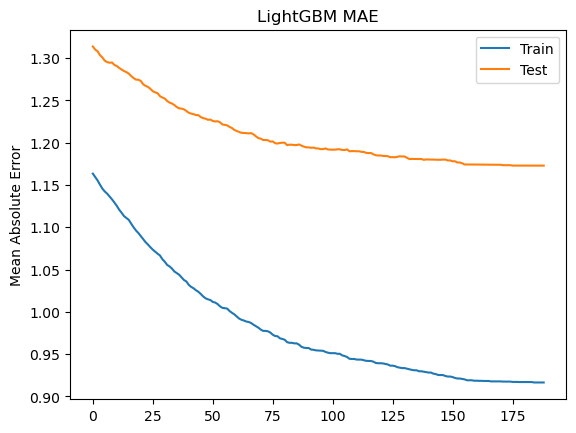

In [26]:
epoch = len(results['training']['l1'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'], label='Train')
ax.plot(x_axis, results['valid_1']['l1'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('LightGBM MAE')
pyplot.savefig('LightGBM_MAE_tuned.png')
pyplot.show()

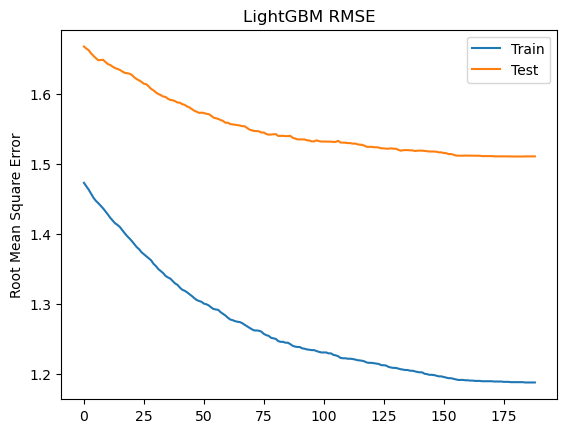

In [27]:
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('LightGBM RMSE')
pyplot.savefig('LightGBM_RMSE_tuned.png')
pyplot.show()

In [28]:
perm = PermutationImportance(BestMDPocket, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0483 ± 0.0221,arg
0.0274 ± 0.0201,gly
0.0207 ± 0.0174,arg_st
0.0202 ± 0.0280,apol_as_prop
0.0170 ± 0.0052,his_st
0.0138 ± 0.0230,his
0.0094 ± 0.0084,nb_as_st
0.0086 ± 0.0042,pock_pol_asa
0.0054 ± 0.0060,pock_volume
0.0051 ± 0.0048,cys_st


In [29]:
# this might be the best one
eli5.show_weights(BestMDPocket, importance_type="split")  #"weight" - how often a feature has been used in making splits

Weight,Feature
0.0899,cys
0.0767,apol_as_prop
0.0688,his
0.0582,arg
0.0503,gly
0.0423,nb_as
0.0397,pock_apol_asa22
0.0370,mean_as_ray
0.0317,arg_st
0.0317,mean_as_solv_acc_st


In [30]:
eli5.show_weights(BestMDPocket, importance_type="gain")

Weight,Feature
0.0875,cys
0.0864,arg
0.0765,his
0.0736,apol_as_prop
0.0643,arg_st
0.0497,gly
0.0388,pock_pol_asa
0.0354,mean_as_ray
0.0323,pock_apol_asa22
0.0299,nb_as


In [31]:
from sklearn import metrics
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
## residuals
residuals = []
for i, c in zip(y_test, y_pred):
    residuals.append(i - c)

R2 (explained variance): 0.18
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 2.86
Mean Absolute Error (Σ|y-pred|/n): 1.17
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1.51


[1]	training's l1: 1.11031	training's rmse: 1.41512	training's l2: 2.00256	valid_1's l1: 1.24662	valid_1's rmse: 1.59746	valid_1's l2: 2.55188
[2]	training's l1: 1.07059	training's rmse: 1.37305	training's l2: 1.88526	valid_1's l1: 1.20246	valid_1's rmse: 1.54449	valid_1's l2: 2.38545
[3]	training's l1: 1.05017	training's rmse: 1.34811	training's l2: 1.81739	valid_1's l1: 1.17106	valid_1's rmse: 1.51081	valid_1's l2: 2.28255
[4]	training's l1: 1.01342	training's rmse: 1.30631	training's l2: 1.70644	valid_1's l1: 1.12751	valid_1's rmse: 1.46178	valid_1's l2: 2.13681
[5]	training's l1: 0.97021	training's rmse: 1.26489	training's l2: 1.59995	valid_1's l1: 1.10653	valid_1's rmse: 1.43618	valid_1's l2: 2.06262
[6]	training's l1: 0.937286	training's rmse: 1.23725	training's l2: 1.53079	valid_1's l1: 1.09291	valid_1's rmse: 1.42089	valid_1's l2: 2.01893
[7]	training's l1: 0.916466	training's rmse: 1.21483	training's l2: 1.47582	valid_1's l1: 1.08151	valid_1's rmse: 1.4143	valid_1's l2: 2.0002

/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


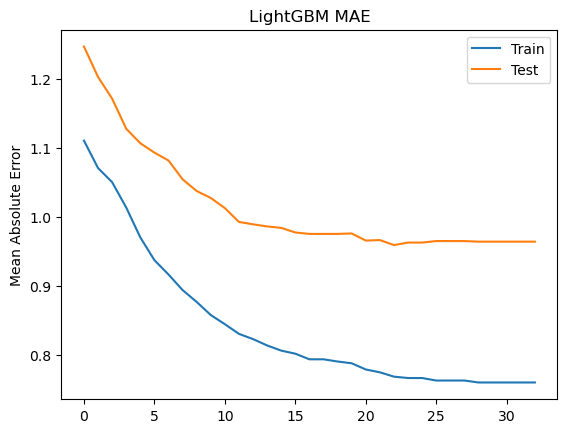

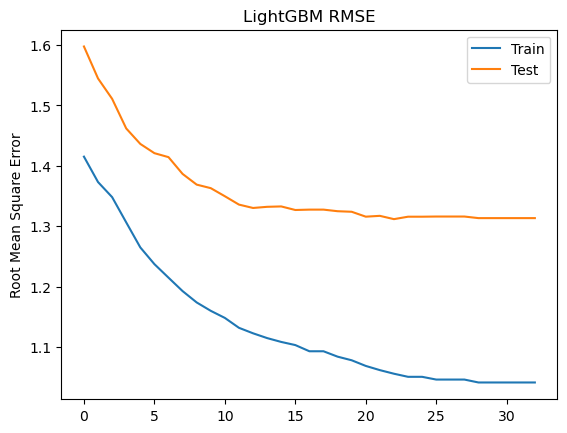

In [32]:
BestMD = LGBMRegressor(colsample_bytree=0.4, learning_rate=0.2, max_depth=1,
              min_split_gain=6, n_estimators=40, num_leaves=21, random_state=7,
              reg_alpha=0.4, reg_lambda=2)
X_train, X_test, y_train, y_test = train_test_split(MD, Y, test_size=0.2, random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
BestMD.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = BestMD.predict(X_test)
predictions = [value for value in y_pred]
results = BestMD.evals_result_
epoch = len(results['training']['l1'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'], label='Train')
ax.plot(x_axis, results['valid_1']['l1'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('LightGBM MAE')
pyplot.savefig('LightGBM_MAE_tuned.png')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('LightGBM RMSE')
pyplot.savefig('LightGBM_RMSE_tuned.png')
pyplot.show()

In [33]:
perm = PermutationImportance(BestMD, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


# from sklearn.feature_extraction import DictVectorizer
# vec = DictVectorizer()
# booster = BestMD.get_booster()
# original_feature_names = booster.feature_names
# print(booster.get_dump()[0])
# booster.feature_names = original_feature_names

Weight,Feature
0.1618 ± 0.0972,halpha
0.0645 ± 0.0659,gravy
0.0599 ± 0.0515,X.m
0.0126 ± 0.0136,ip
0.0125 ± 0.0165,instability
0.0067 ± 0.0250,X.a
0.0023 ± 0.0169,turn
0.0002 ± 0.0172,h_3.10
0 ± 0.0000,rog_bs_ca
0 ± 0.0000,rog_bs_ca_sd


In [34]:
from eli5 import show_weights
show_weights(BestMD, importance_type="weight") #“cover” - the average coverage of the feature.

Weight,Feature
0.2609,halpha
0.1739,gravy
0.1304,X.m
0.0870,instability
0.0870,X.a
0.0870,h_3.10
0.0870,turn
0.0435,ip
0.0435,rmsd_bs_bb
0,rog_bs_ca_sd


In [35]:
# this might be the best one
show_weights(BestMD, importance_type="split")  #"weight" - how often a feature has been used in making splits

Weight,Feature
0.2609,halpha
0.1739,gravy
0.1304,X.m
0.0870,instability
0.0870,X.a
0.0870,h_3.10
0.0870,turn
0.0435,ip
0.0435,rmsd_bs_bb
0,rog_bs_ca_sd


In [36]:
show_weights(BestMD, importance_type="gain")

Weight,Feature
0.3909,halpha
0.2064,gravy
0.1389,X.m
0.0675,turn
0.0630,ip
0.0599,instability
0.0343,h_3.10
0.0294,X.a
0.0098,rmsd_bs_bb
0,rmsd_pro_noh


In [37]:
from sklearn import metrics
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
## residuals
residuals = []
for i, c in zip(y_test, y_pred):
    residuals.append(i - c)

R2 (explained variance): 0.38
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 122.67
Mean Absolute Error (Σ|y-pred|/n): 0.96
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1.32


[1]	training's l1: 1.13451	training's rmse: 1.43835	training's l2: 2.06885	valid_1's l1: 1.28227	valid_1's rmse: 1.63605	valid_1's l2: 2.67666
[2]	training's l1: 1.10415	training's rmse: 1.40582	training's l2: 1.97633	valid_1's l1: 1.25743	valid_1's rmse: 1.60854	valid_1's l2: 2.58739
[3]	training's l1: 1.06935	training's rmse: 1.3672	training's l2: 1.86925	valid_1's l1: 1.2213	valid_1's rmse: 1.5713	valid_1's l2: 2.46899
[4]	training's l1: 1.03875	training's rmse: 1.33357	training's l2: 1.7784	valid_1's l1: 1.189	valid_1's rmse: 1.53797	valid_1's l2: 2.36535
[5]	training's l1: 1.00478	training's rmse: 1.29601	training's l2: 1.67963	valid_1's l1: 1.15957	valid_1's rmse: 1.50356	valid_1's l2: 2.2607
[6]	training's l1: 0.974907	training's rmse: 1.26407	training's l2: 1.59786	valid_1's l1: 1.13855	valid_1's rmse: 1.47764	valid_1's l2: 2.18343
[7]	training's l1: 0.948823	training's rmse: 1.23624	training's l2: 1.52828	valid_1's l1: 1.11712	valid_1's rmse: 1.45424	valid_1's l2: 2.1148
[8]	t

/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


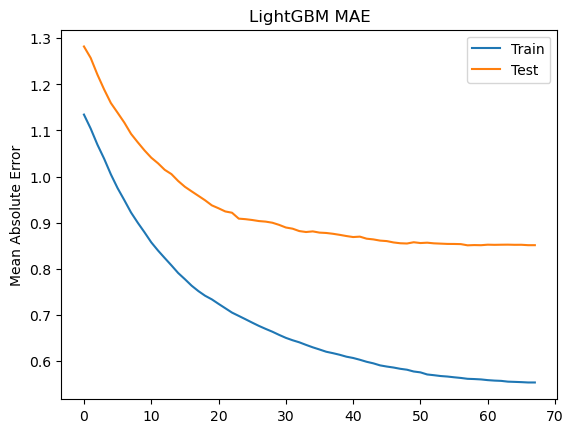

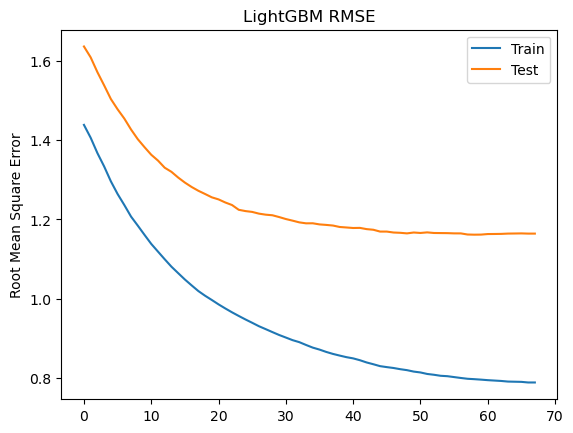

Weight,Feature
0.0486 ± 0.0591,VHSE2.1
0.0408 ± 0.0725,BLOSUM8.1
0.0227 ± 0.0203,KF7.1
0.0209 ± 0.0163,MSWHIM1.1
0.0167 ± 0.0063,KF10.1
0.0145 ± 0.0144,T4.1
0.0131 ± 0.0112,ProtFP8.1
0.0124 ± 0.0278,ST2.1
0.0096 ± 0.0135,T3.1
0.0096 ± 0.0084,ST7.1


In [38]:
BestSeq = LGBMRegressor(colsample_bytree=0.4, learning_rate=0.07, max_depth=71,
              min_split_gain=1, n_estimators=890, num_leaves=71, random_state=7,
              reg_alpha=0.6, reg_lambda=4)
X_train, X_test, y_train, y_test = train_test_split(Seq, Y, test_size=0.2, random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
BestSeq.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = BestSeq.predict(X_test)
predictions = [value for value in y_pred]
results = BestSeq.evals_result_
epoch = len(results['training']['l1'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'], label='Train')
ax.plot(x_axis, results['valid_1']['l1'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('LightGBM MAE')
pyplot.savefig('LightGBM_MAE_tuned.png')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('LightGBM RMSE')
pyplot.savefig('LightGBM_RMSE_tuned.png')
pyplot.show()

perm = PermutationImportance(BestSeq, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


# from sklearn.feature_extraction import DictVectorizer
# vec = DictVectorizer()
# booster = BestSeq.get_booster()
# original_feature_names = booster.feature_names
# print(booster.get_dump()[0])
# booster.feature_names = original_feature_names

In [39]:
from eli5 import show_weights
show_weights(BestSeq, importance_type="split") #“cover” - the average coverage of the feature.

Weight,Feature
0.0559,VHSE2.1
0.0559,ST2.1
0.0528,KF7.1
0.0466,KF10.1
0.0435,Z3.1
0.0435,MSWHIM2.1
0.0435,ProtFP8.1
0.0404,BLOSUM8.1
0.0342,KF9.1
0.0311,ProtFP3.1


In [40]:
# this might be the best one
show_weights(BestSeq, importance_type="weight")  #"weight" - how often a feature has been used in making splits

Weight,Feature
0.0559,VHSE2.1
0.0559,ST2.1
0.0528,KF7.1
0.0466,KF10.1
0.0435,Z3.1
0.0435,MSWHIM2.1
0.0435,ProtFP8.1
0.0404,BLOSUM8.1
0.0342,KF9.1
0.0311,ProtFP3.1


In [41]:
show_weights(BestSeq, importance_type="gain")

Weight,Feature
0.2052,BLOSUM8.1
0.1230,VHSE2.1
0.0640,Z3.1
0.0624,KF4.1
0.0433,KF7.1
0.0427,MSWHIM1.1
0.0425,ProtFP8.1
0.0418,KF9.1
0.0353,T1.1
0.0323,ST2.1


In [42]:
from sklearn import metrics
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
## residuals
residuals = []
for i, c in zip(y_test, y_pred):
    residuals.append(i - c)


R2 (explained variance): 0.51
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 22.77
Mean Absolute Error (Σ|y-pred|/n): 0.85
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1.16


[1]	training's l1: 1.16164	training's rmse: 1.46986	training's l2: 2.16048	valid_1's l1: 1.31205	valid_1's rmse: 1.66544	valid_1's l2: 2.77371
[2]	training's l1: 1.15538	training's rmse: 1.46241	training's l2: 2.13863	valid_1's l1: 1.30531	valid_1's rmse: 1.65821	valid_1's l2: 2.74966
[3]	training's l1: 1.14914	training's rmse: 1.45498	training's l2: 2.11697	valid_1's l1: 1.29864	valid_1's rmse: 1.65098	valid_1's l2: 2.72574
[4]	training's l1: 1.14299	training's rmse: 1.44771	training's l2: 2.09586	valid_1's l1: 1.29202	valid_1's rmse: 1.64395	valid_1's l2: 2.70258
[5]	training's l1: 1.1369	training's rmse: 1.44052	training's l2: 2.07511	valid_1's l1: 1.28546	valid_1's rmse: 1.63702	valid_1's l2: 2.67985
[6]	training's l1: 1.13085	training's rmse: 1.43337	training's l2: 2.05454	valid_1's l1: 1.27895	valid_1's rmse: 1.6301	valid_1's l2: 2.65724
[7]	training's l1: 1.12495	training's rmse: 1.42636	training's l2: 2.0345	valid_1's l1: 1.27251	valid_1's rmse: 1.62338	valid_1's l2: 2.63535
[8

/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[27]	training's l1: 1.01726	training's rmse: 1.30278	training's l2: 1.69724	valid_1's l1: 1.17025	valid_1's rmse: 1.50902	valid_1's l2: 2.27715
[28]	training's l1: 1.01246	training's rmse: 1.29741	training's l2: 1.68328	valid_1's l1: 1.16631	valid_1's rmse: 1.50413	valid_1's l2: 2.26241
[29]	training's l1: 1.00768	training's rmse: 1.2921	training's l2: 1.66954	valid_1's l1: 1.16278	valid_1's rmse: 1.49969	valid_1's l2: 2.24907
[30]	training's l1: 1.00286	training's rmse: 1.28683	training's l2: 1.65592	valid_1's l1: 1.15891	valid_1's rmse: 1.49489	valid_1's l2: 2.23469
[31]	training's l1: 0.998058	training's rmse: 1.28163	training's l2: 1.64258	valid_1's l1: 1.15519	valid_1's rmse: 1.49028	valid_1's l2: 2.22093
[32]	training's l1: 0.993407	training's rmse: 1.27652	training's l2: 1.62951	valid_1's l1: 1.15176	valid_1's rmse: 1.48606	valid_1's l2: 2.20837
[33]	training's l1: 0.9887	training's rmse: 1.27145	training's l2: 1.61658	valid_1's l1: 1.14798	valid_1's rmse: 1.48148	valid_1's l2: 

/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[233]	training's l1: 0.536128	training's rmse: 0.76853	training's l2: 0.590639	valid_1's l1: 0.861633	valid_1's rmse: 1.1844	valid_1's l2: 1.40279
[234]	training's l1: 0.535009	training's rmse: 0.767213	training's l2: 0.588616	valid_1's l1: 0.861651	valid_1's rmse: 1.18424	valid_1's l2: 1.40242
[235]	training's l1: 0.533873	training's rmse: 0.765809	training's l2: 0.586463	valid_1's l1: 0.861662	valid_1's rmse: 1.18433	valid_1's l2: 1.40264
[236]	training's l1: 0.532766	training's rmse: 0.764514	training's l2: 0.584482	valid_1's l1: 0.861681	valid_1's rmse: 1.18418	valid_1's l2: 1.40229
[237]	training's l1: 0.531615	training's rmse: 0.763176	training's l2: 0.582437	valid_1's l1: 0.861988	valid_1's rmse: 1.18398	valid_1's l2: 1.40181
[238]	training's l1: 0.530771	training's rmse: 0.762046	training's l2: 0.580715	valid_1's l1: 0.861691	valid_1's rmse: 1.18367	valid_1's l2: 1.40107
[239]	training's l1: 0.529518	training's rmse: 0.760571	training's l2: 0.578468	valid_1's l1: 0.861596	valid

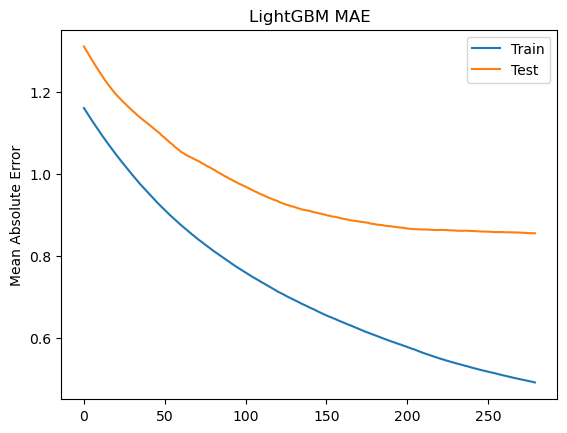

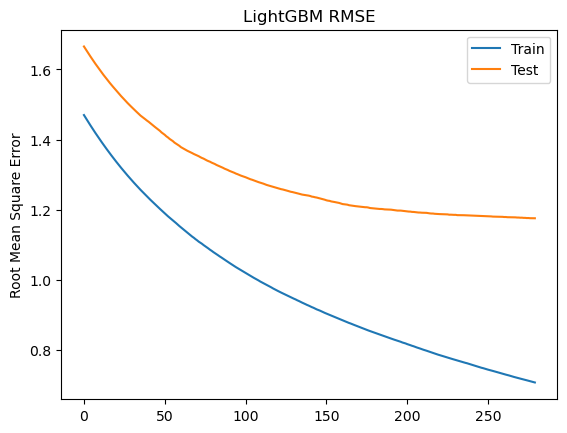

Weight,Feature
0.0874 ± 0.0674,BLOSUM8.1
0.0613 ± 0.0337,VHSE2.1
0.0538 ± 0.0482,halpha
0.0307 ± 0.0155,T4.1
0.0287 ± 0.0208,KF7.1
0.0191 ± 0.0060,ProtFP7.1
0.0154 ± 0.0122,Z3.1
0.0116 ± 0.0112,h_3.10
0.0105 ± 0.0064,random.coil
0.0076 ± 0.0126,BLOSUM2.1


In [43]:
# SEQ_MD

BestSeqMD = LGBMRegressor(colsample_bytree=1, learning_rate=0.01, max_depth=51,
              min_split_gain=0, n_estimators=280, num_leaves=61, random_state=7,
              reg_alpha=0.1, reg_lambda=6)
X_train, X_test, y_train, y_test = train_test_split(Seq_MD, Y, test_size=0.2, random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
BestSeqMD.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = BestSeqMD.predict(X_test)
predictions = [value for value in y_pred]
results = BestSeqMD.evals_result_BestSeqMD = LGBMRegressor(colsample_bytree=1, learning_rate=0.01, max_depth=51,
              min_split_gain=0, n_estimators=280, num_leaves=61, random_state=7,
              reg_alpha=0.1, reg_lambda=6)
X_train, X_test, y_train, y_test = train_test_split(Seq_MD, Y, test_size=0.2, random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
BestSeqMD.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = BestSeqMD.predict(X_test)
predictions = [value for value in y_pred]
results = BestSeqMD.evals_result_
epoch = len(results['training']['l1'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'], label='Train')
ax.plot(x_axis, results['valid_1']['l1'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('LightGBM MAE')
pyplot.savefig('LightGBM_MAE_tuned.png')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('LightGBM RMSE')
pyplot.savefig('LightGBM_RMSE_tuned.png')
pyplot.show()

perm = PermutationImportance(BestSeqMD, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


# from sklearn.feature_extraction import DictVectorizer
# vec = DictVectorizer()
# booster = BestSeqMD.get_booster()
# original_feature_names = booster.feature_names
# print(booster.get_dump()[0])
# booster.feature_names = original_feature_names

In [44]:
from eli5 import show_weights
show_weights(BestSeqMD, importance_type="split") #“cover” - the average coverage of the feature.

Weight,Feature
0.0967,halpha
0.0560,BLOSUM8.1
0.0511,h_3.10
0.0434,VHSE2.1
0.0385,KF8.1
0.0354,turn
0.0300,T4.1
0.0273,KF7.1
0.0255,ProtFP7.1
0.0237,VHSE5.1


In [45]:
# this might be the best one
show_weights(BestSeqMD, importance_type="weight")  #"weight" - how often a feature has been used in making splits

Weight,Feature
0.0967,halpha
0.0560,BLOSUM8.1
0.0511,h_3.10
0.0434,VHSE2.1
0.0385,KF8.1
0.0354,turn
0.0300,T4.1
0.0273,KF7.1
0.0255,ProtFP7.1
0.0237,VHSE5.1


In [46]:
show_weights(BestSeqMD, importance_type="gain")

Weight,Feature
0.2327,BLOSUM8.1
0.1931,VHSE2.1
0.0981,halpha
0.0585,KF7.1
0.0505,KF4.1
0.0426,Z3.1
0.0336,h_3.10
0.0292,T4.1
0.0224,KF8.1
0.0212,ProtFP7.1


In [47]:
from sklearn import metrics
## Kpi
predictions = [value for value in y_pred]
print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
## residuals
residuals = []
for i, c in zip(y_test, y_pred):
    residuals.append(i - c)

R2 (explained variance): 0.5
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 3.33
Mean Absolute Error (Σ|y-pred|/n): 0.86
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1.18


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

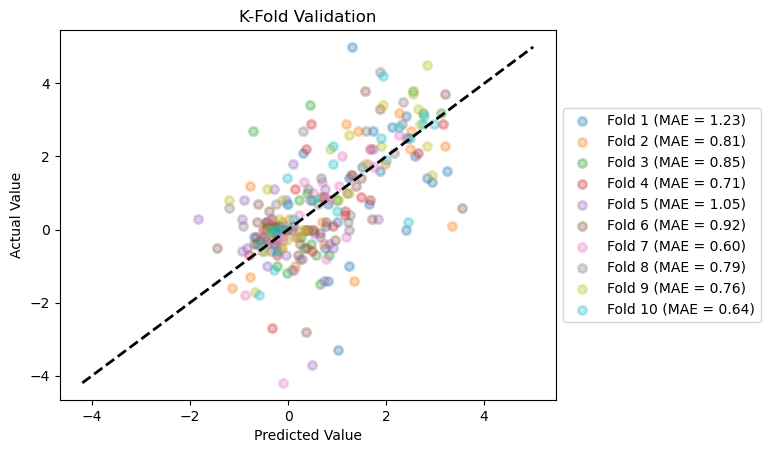

In [48]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error

scores = []
cv = KFold(n_splits=10, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train.iloc[train],
                 y_train.iloc[train]).predict(X_train.iloc[test])
    true = y_train.iloc[test]
    score = mean_absolute_error(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3,
                label='Fold %d (MAE = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)],
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('K-Fold Validation')
plt.legend(prop={"size":10}, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [49]:
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test.iloc[max_idx], y_pred[max_idx]
print("Max Error:", "{:,.2f}".format(max_error))

Max Error: -3.90


In [50]:
print(y_test.iloc[20] - y_pred[20])

-3.9004747120586947


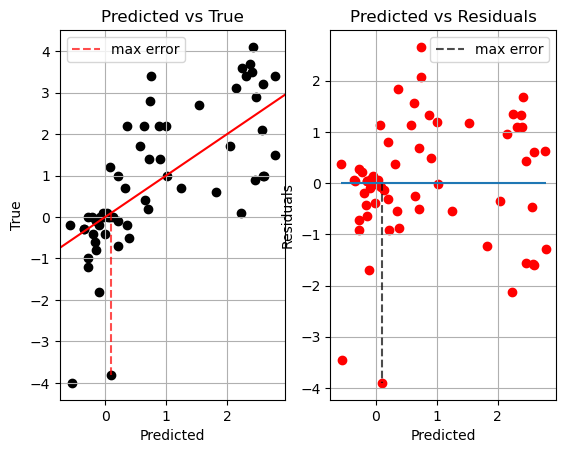

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(y_pred, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()

## Plot predicted vs residuals
ax[1].scatter(y_pred, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(y_pred), xmax=np.max(y_pred))
ax[1].legend()

plt.show()

In [52]:
import seaborn as sns
fig, ax = plt.subplots()
sns.distplot(residuals, color="blue", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.savefig("Residues_dist.png", dpi=350)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
import shap

In [ ]:
shap_values = shap.Explainer(BestSeqMD).shap_values(X_train)

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.savefig("SHAP_importance.png", dpi=1200, bbox_inches = "tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)

In [ ]:
# BestMDMDpocket = LGBMRegressor(colsample_bytree=1, learning_rate=0.6, max_depth=81,
#               min_split_gain=19, n_estimators=350, num_leaves=81,
#               random_state=7, reg_alpha=1, reg_lambda=5)
# X_train, X_test, y_train, y_test = train_test_split(MD_MDpocket, Y, test_size=0.2, random_state=seed)
# eval_set = [(X_train, y_train), (X_test, y_test)]
# BestMDMDpocket.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
# y_pred = BestMDMDpocket.predict(X_test)
# predictions = [value for value in y_pred]
# results = BestMDMDpocket.evals_result_
# epoch = len(results['training']['l1'])
# x_axis = range(0, epoch)
# # plot log loss
# fig, ax = pyplot.subplots()
# ax.plot(x_axis, results['training']['l1'], label='Train')
# ax.plot(x_axis, results['valid_1']['l1'], label='Test')
# ax.legend()
# pyplot.ylabel('Mean Absolute Error')
# pyplot.title('LightGBM MAE')
# pyplot.savefig('LightGBM_MAE_tuned.png')
# pyplot.show()
# # plot classification error
# fig, ax = pyplot.subplots()
# ax.plot(x_axis, results['training']['rmse'], label='Train')
# ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
# ax.legend()
# pyplot.ylabel('Root Mean Square Error')
# pyplot.title('LightGBM RMSE')
# pyplot.savefig('LightGBM_RMSE_tuned.png')
# pyplot.show()

In [ ]:
# from sklearn import metrics
# ## Kpi
# print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
# print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
# print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
# print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
# ## residuals
# residuals = []
# for i, c in zip(y_test, y_pred):
#     residuals.append(i - c)

In [ ]:
# show_weights(BestMDMDpocket, importance_type="gain")
#

In [ ]:
# show_weights(BestMDMDpocket, importance_type="split")
#

In [ ]:
# show_weights(BestSeqMDpocket, importance_type="gain")
#

In [ ]:
# show_weights(BestSeqMDpocket, importance_type="split")
#

In [ ]:
# BestSeqMDpocket = LGBMRegressor(colsample_bytree=0.8, learning_rate=0.01, max_depth=11,
#               min_split_gain=5, n_estimators=530, num_leaves=91, random_state=7,
#               reg_alpha=0.2, reg_lambda=8)
#
# X_train, X_test, y_train, y_test = train_test_split(Seq_MDpocket, Y, test_size=0.2, random_state=seed)
# eval_set = [(X_train, y_train), (X_test, y_test)]
# BestSeqMDpocket.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
# y_pred = BestSeqMDpocket.predict(X_test)
# predictions = [value for value in y_pred]
# results = BestMDMDpocket.evals_result_
# epoch = len(results['training']['l1'])
# x_axis = range(0, epoch)
# # plot log loss
# fig, ax = pyplot.subplots()
# ax.plot(x_axis, results['training']['l1'], label='Train')
# ax.plot(x_axis, results['valid_1']['l1'], label='Test')
# ax.legend()
# pyplot.ylabel('Mean Absolute Error')
# pyplot.title('LightGBM MAE')
# pyplot.savefig('LightGBM_MAE_tuned.png')
# pyplot.show()
# # plot classification error
# fig, ax = pyplot.subplots()
# ax.plot(x_axis, results['training']['rmse'], label='Train')
# ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
# ax.legend()
# pyplot.ylabel('Root Mean Square Error')
# pyplot.title('LightGBM RMSE')
# pyplot.savefig('LightGBM_RMSE_tuned.png')
# pyplot.show()
# from sklearn import metrics
# ## Kpi
# print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
# print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
# print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
# print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
# ## residuals
# residuals = []
# for i, c in zip(y_test, y_pred):
#     residuals.append(i - c)

In [ ]:
#### LAZY COMPARISON ####
# from lazypredict.Supervised import LazyRegressor
# from sklearn.model_selection import train_test_split
# #
# models_lazy = []
# datasets = [MDPocket, MD, Seq, Seq_MD, MD_MDpocket, Seq_MDpocket]
# for dataset in datasets:
#     X_train, X_test, y_train, y_test = train_test_split(dataset, Y, test_size=0.2, random_state=seed)
#     reg = LazyRegressor(predictions=True)
#     models, predictions = reg.fit(X_train, X_test, y_train, y_test)
#     models_lazy.append(models)

In [ ]:
#fit all models



In [ ]:
models_lazy[5]

In [ ]:
# import eli5
# from eli5.sklearn import PermutationImportance
# X_train, X_test, y_train, y_test = train_test_split(Seq, Y, test_size=0.2, random_state=seed)
#
# perm = PermutationImportance(BestSeq, random_state=1).fit(X_test, y_test)
# eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
# import shap  # package used to calculate Shap values
#
# explainer = shap.TreeExplainer(Best_estimator)
# shap_values = explainer.shap_values(X)

In [ ]:
# shap.summary_plot(shap_values, X)

In [ ]:
# shap.summary_plot(shap_values, X)

In [ ]:
shap.dependence_plot('VHSE2.1', shap_values, X, dot_size=32)

In [ ]:
shap.dependence_plot('halpha', shap_values, X, dot_size=32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Seq_MD, Y, test_size=0.2, random_state=seed)
explainer = shap.Explainer(BestSeqMD)
shap_values = explainer(Seq_MD)
shap_values_test = explainer(X_test)
shap_values_train = explainer(X_train)

In [ ]:
for colu in Seq_MD:
    shap.dependence_plot(colu, shap_values, Seq_MD, dot_size=32)

In [ ]:
corr_matrix = pd.DataFrame(shap_values.values,columns=Seq_MD.columns).corr()
# change this value as needed, if 0.5 does not work for your scenario


In [ ]:
# Display Correlations
ax = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#plt.savefig('shap_correlation.png',dpi=300,bbox_inches='tight')

In [ ]:
shap.summary_plot(shap_values_test, X_test, max_display=12)
# plt.savefig("my_importance_plot.pdf", dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
shap.summary_plot(shap_values_train, X_train, max_display=12)

In [ ]:
shap.summary_plot(shap_values, Seq_MD, max_display=12, show=False)
# shap.plots.heatmap(shap_values)
plt.savefig("my_heatmap_SeqMD.png", dpi=1200, bbox_inches='tight')
plt.show()
# # plt.show()

In [ ]:
shap.plots.heatmap(shap_values, max_display=12, show=False)
plt.savefig("my_features_heatmap_SeqMD.png", dpi=1200, bbox_inches='tight')
plt.show()

In [ ]:
# if you want to save the above
# shap.plots.beeswarm(shap_values, max_display=12, show=False)
# plt.title("")
# plt.ylabel("")
# plt.savefig("my_beeswarm_plot.tiff", dpi=350, bbox_inches='tight') # we can save a PDF of the figure if we want
# plt.show()

In [ ]:
# shap.plots.scatter(shap_values[:,"halpha"], show=False, dot_size=30, color=shap_values)
# plt.title("halpha dependence plot")
# plt.ylabel("SHAP value for halpha")
# plt.savefig("my_dependence_plot_halpha_high_res.tiff", dpi=350) # we can save a PDF of the figure if we want
# plt.show()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
#
# explainer = shap.Explainer(Best_estimator)
# shap_values_X_test = explainer(X_test)


In [ ]:
# shap_interaction = explainer.shap_interaction_values(X_test)
#

In [ ]:
# shap.summary_plot(shap_interaction, X_test)

In [ ]:
# mean_shap = np.abs(shap_interaction).mean(0)
# df = pd.DataFrame(mean_shap,index=X.columns,columns=X.columns)
#
# # times off diagonal by 2
# df.where(df.values == np.diagonal(df),df.values*2,inplace=True)
#
# # display
# plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
# sns.set(font_scale=1.5)
# sns.heatmap(df,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
# plt.yticks(rotation=0)


In [ ]:
# shap.plots.heatmap(shap_values, max_display=12, show=False)
# plt.title("")
# plt.ylabel("")
# plt.savefig("Light_heatmap_plot.tiff", dpi=350, bbox_inches="tight")
# plt.show()

In [ ]:
# fitting GAMMA and POISSON as they were missed out
# from sklearn.linear_model import PoissonRegressor
# model = PoissonRegressor()
# y_poiss =
# model.fit(X_train, y_train)
# ERROR: Some value(s) of y are out of the valid range for family PoissonDistribution and GammaDistribution

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(Y)
shapiro_test

In [ ]:
# from scipy import stats
# import pylab
# stats.probplot(Y, dist="norm", plot=pylab)
# pylab.show()
import pingouin as pg
ax = pg.qqplot(Y, dist="norm")

In [ ]:
# from scipy.stats import skew, kurtosis
# skew(Y, bias=False)
#

In [ ]:
# kurtosis(Y, bias=False)

In [ ]:
ax = sns.distplot(Y, hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='FIS', ylabel='Frequency')
plt.savefig("HIST_Y.png", dpi=1200)
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# shap_values
# f = plt.figure()
# shap.summary_plot(shap_values, X_train)

In [ ]:
explainer = shap.TreeExplainer(BestSeqMD)
shap_values = explainer.shap_values(Seq_MD)
shap.dependence_plot("h_3.10", shap_values, Seq_MD)

In [ ]:
shap.dependence_plot("halpha", shap_values, Seq_MD)

In [ ]:
shap.dependence_plot("", shap_values, Seq_MD)

In [ ]:
# we can use shap.approximate_interactions to guess which features
# may interact with age
inds = shap.approximate_interactions("halpha", shap_values, Seq_MD)

# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot("halpha", shap_values, Seq_MD, interaction_index=inds[i])

In [ ]:
X.columns.get_loc("o")

In [ ]:
X.columns.get_loc("random.coil")

In [ ]:
X.columns.get_loc("pock_volume")

In [ ]:
len(X.columns)

In [ ]:
# 80 32
# 32 79 66

In [ ]:
Y
import plotly.express as px
df = px.data.tips()
fig = px.histogram(Y)
fig.show()

In [ ]:
X.var()